<a href="https://colab.research.google.com/github/Fauzan-Al1/Deep_Learning/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Linear Regression (Normal Equation)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate data: y = 4 + 3x + noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Linear Regression via scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept: {lin_reg.intercept_}, Coef: {lin_reg.coef_}")

Intercept: [3.95540851], Coef: [[3.01242224]]


In [2]:
# Implementasi manual Gradient Descent
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # Inisialisasi acak parameter

# Tambahkan x0 = 1 ke setiap fitur untuk bias term
X_b = np.c_[np.ones((m,1)), X]

# Iterasi gradient descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta from Gradient Descent:", theta)


Theta from Gradient Descent: [[3.95540851]
 [3.01242224]]


In [3]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Pipeline: polynomial transform + linear regression
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_reg.fit(X, y)

# Prediksi untuk x = 1.5
print("Polynomial Prediction (x=1.5):", poly_reg.predict([[1.5]]))

Polynomial Prediction (x=1.5): [[8.41590714]]


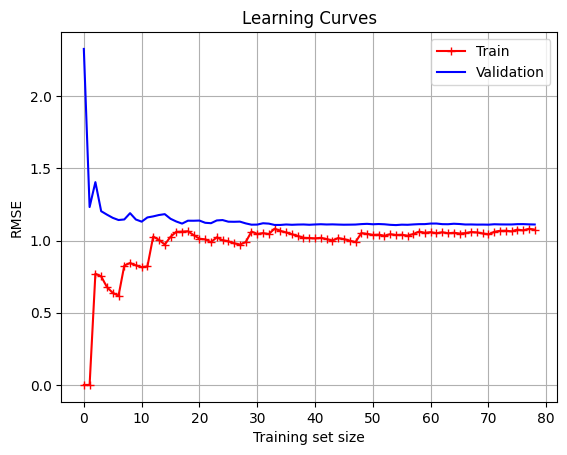

In [4]:
# Learning Curve Function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", label="Train")
    plt.plot(np.sqrt(val_errors), "b-", label="Validation")
    plt.legend()
    plt.grid()
    plt.ylabel("RMSE")
    plt.xlabel("Training set size")
    plt.title("Learning Curves")

plot_learning_curves(LinearRegression(), X, y)

In [5]:
# Ridge Regression (L2 Regularization)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

print("Ridge Prediction (x=1.5):", ridge_reg.predict([[1.5]]))

Ridge Prediction (x=1.5): [8.44074098]


In [6]:
# Lasso Regression (L1 Regularization)
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

print("Lasso Prediction (x=1.5):", lasso_reg.predict([[1.5]]))


Lasso Prediction (x=1.5): [8.36041326]


In [7]:
# Elastic Net = kombinasi L1 dan L2 regularization
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

print("ElasticNet Prediction (x=1.5):", elastic_net.predict([[1.5]]))

ElasticNet Prediction (x=1.5): [8.27397999]


In [8]:
# SGD Regressor tanpa regularisasi (early stopping)
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, eta0=0.1, max_iter=1000)
sgd_reg.fit(X, y.ravel())

print("SGD Prediction (x=1.5):", sgd_reg.predict([[1.5]]))

SGD Prediction (x=1.5): [8.51055173]
